In [17]:
import numpy as np
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats

# 1. Сбор данных

In [2]:
height = [1.73, 1.76, 1.83, 1.66, 1.72, 1.77, 1.85, 1.87, 1.59, 1.79, 2.03]
month = [5, 11, 2, 2, 12, 9, 8, 7, 9, 10, 10]
number = [8, 1, 6, 0, 7, 8, 1, 6, 4, 2, 1]

# 2. Обработка данных

## 2.1 Обработка целочисленных данных

Построим вариационный ряд с абсолютными и относительными
частотами по выборке дискретных данных

In [3]:
# Построение таблицы частот
data = pd.DataFrame({'month': month, 'number': number})

# Вариационный ряд и абсолютные частоты
frequency_table = data['number'].value_counts().sort_index()
frequency_table_for_month = data['month'].value_counts().sort_index()
print(frequency_table)
print(frequency_table_for_month)

# Частости
relative_frequencies = frequency_table / len(data)
relative_frequencies_for_month = frequency_table_for_month / len(data)
print(relative_frequencies)
print(relative_frequencies_for_month)


number
0    1
1    3
2    1
4    1
6    2
7    1
8    2
Name: count, dtype: int64
month
2     2
5     1
7     1
8     1
9     2
10    2
11    1
12    1
Name: count, dtype: int64
number
0    0.090909
1    0.272727
2    0.090909
4    0.090909
6    0.181818
7    0.090909
8    0.181818
Name: count, dtype: float64
month
2     0.181818
5     0.090909
7     0.090909
8     0.090909
9     0.181818
10    0.181818
11    0.090909
12    0.090909
Name: count, dtype: float64


In [4]:

# Таблица частот
frequency_distribution = pd.DataFrame({
    'Absolute Frequency': frequency_table,
    'Relative Frequency': relative_frequencies
})

frequency_distribution_for_month = pd.DataFrame({
    'Absolute Frequency': frequency_table_for_month,
    'Relative Frequency': relative_frequencies_for_month
})
frequency_distribution

,Absolute Frequency,Relative Frequency
number,,
0,1,0.090909
1,3,0.272727
2,1,0.090909
4,1,0.090909
6,2,0.181818
7,1,0.090909
8,2,0.181818


In [5]:
frequency_distribution_for_month

,Absolute Frequency,Relative Frequency
month,,
2,2,0.181818
5,1,0.090909
7,1,0.090909
8,1,0.090909
9,2,0.181818
10,2,0.181818
11,1,0.090909
12,1,0.090909


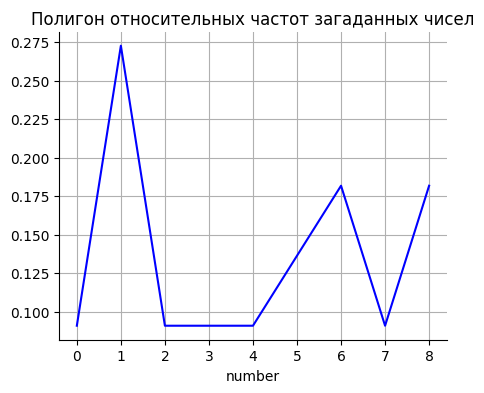

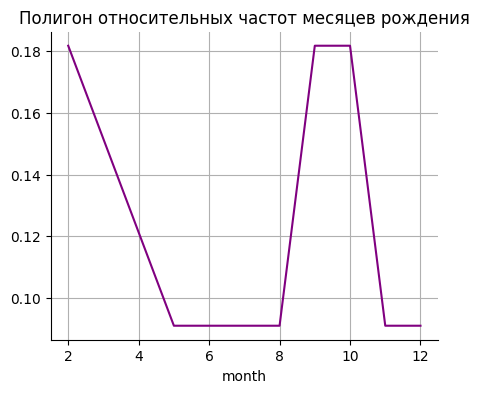

In [6]:
frequency_distribution['Relative Frequency'].plot(kind='line', color='blue', figsize=(5, 4), title='Полигон относительных частот загаданных чисел')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

frequency_distribution_for_month['Relative Frequency'].plot(kind='line', color='purple', figsize=(5, 4), title='Полигон относительных частот месяцев рождения')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

Построим график эмпирической функции распределения

number
0    0.090909
1    0.363636
2    0.454545
4    0.545455
6    0.727273
7    0.818182
8    1.000000
Name: count, dtype: float64


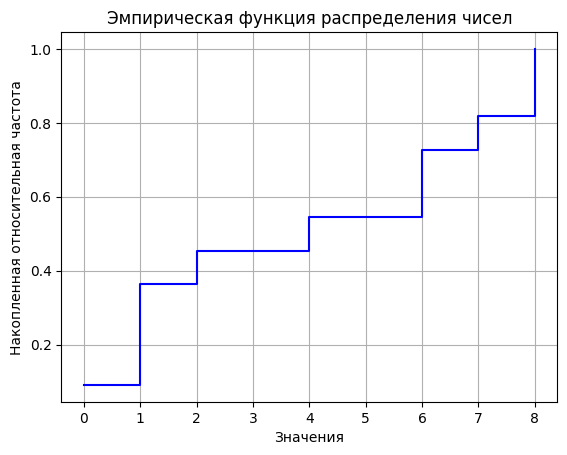

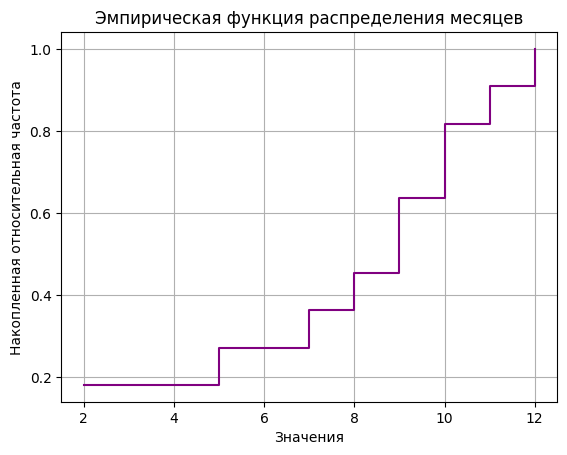

In [7]:
# Вычисление эмпирической функции распределения
empirical_distribution = relative_frequencies.cumsum()
print(empirical_distribution)
empirical_distribution_for_month = relative_frequencies_for_month.cumsum()

# График эмпирической функции распределения
plt.step(empirical_distribution.index, empirical_distribution, color='blue', where='post')
plt.title('Эмпирическая функция распределения чисел')
plt.xlabel('Значения')
plt.ylabel('Накопленная относительная частота')
plt.grid(True)
plt.show()

#График эмпирической функции распределения для месяца
plt.step(empirical_distribution_for_month.index, empirical_distribution_for_month, where='post', color='purple')
plt.title('Эмпирическая функция распределения месяцев')
plt.xlabel('Значения')
plt.ylabel('Накопленная относительная частота')
plt.grid(True)
plt.show()

Рассчитать выборочные описательные статистики

In [8]:
def desc_stats(column):

  # Выборочное среднее
  mean_value = round(column.mean(), 2)

  # Выборочная дисперсия
  variance = round(column.var(ddof=1), 2)

  # Выборочное стандартное отклонение
  std_deviation = round(column.std(ddof=1), 2)

  # Выборочная медиана
  median_value = round(column.median(), 2)

  # Коэффициент вариации
  coefficient_of_variation = round((std_deviation / mean_value) * 100, 2)
  print(f'Выборочное среднее: {mean_value}, \
          \nВыборочная дисперсия: {variance}, \
          \nВыборочное стандартное отклонение: {std_deviation}, \
          \nВыборочная медиана: {median_value}, \
          \nКоэффициент вариации: {coefficient_of_variation}%')

print('Описательные статистики для загаданных чисел')
desc_stats(data['number'])

print('\nОписательные статистики для месяцев рождения')
desc_stats(data['month'])

Описательные статистики для загаданных чисел
Выборочное среднее: 4.0,           
Выборочная дисперсия: 9.6,           
Выборочное стандартное отклонение: 3.1,           
Выборочная медиана: 4.0,           
Коэффициент вариации: 77.5%

Описательные статистики для месяцев рождения
Выборочное среднее: 7.73,           
Выборочная дисперсия: 11.62,           
Выборочное стандартное отклонение: 3.41,           
Выборочная медиана: 9.0,           
Коэффициент вариации: 44.11%


## 2.2 Обработка вещественных данных

Рассчитаем число групп (интервалов) m для квантования исходных
данных по правилу Стёрджесс

In [9]:
# Данные
height = [1.73, 1.76, 1.83, 1.66, 1.72, 1.77, 1.85, 1.87, 1.59, 1.79, 2.03]

# Число наблюдений
n = len(height)

# Число интервалов по правилу Стёрджесса
m = math.ceil(1 + 3.322 * math.log10(n))
print(f'Число интервалов по правилу Стёрджесса: {m}')

Число интервалов по правилу Стёрджесса: 5


Вычислим значения границ групп для значений выборки по
правилу фиксированной величины интервала

In [10]:

# Минимальное и максимальное значения
min_value = min(height)
max_value = max(height)

# Ширина интервала
interval_width = (max_value - min_value) / m

# Границы интервалов
intervals = [round(min_value + i * interval_width, 2) for i in range(m + 1)]
intervals

[1.59, 1.68, 1.77, 1.85, 1.94, 2.03]

Построим вариационный ряд для выборки интервальных данных

In [11]:
# Построение вариационного ряда
frequency_distribution = np.histogram(height, bins=intervals)
absolute_frequencies = frequency_distribution[0]
interval_edges = frequency_distribution[1]

# Относительные частоты
relative_frequencies = absolute_frequencies / n

# Вариационный ряд
frequency_table = pd.DataFrame({
    'Interval': [f"{interval_edges[i]} - {interval_edges[i+1]}" for i in range(m)],
    'Absolute Frequency': absolute_frequencies,
    'Relative Frequency': relative_frequencies
})

frequency_table

,Interval,Absolute Frequency,Relative Frequency
0,1.59 - 1.68,2,0.181818
1,1.68 - 1.77,3,0.272727
2,1.77 - 1.85,3,0.272727
3,1.85 - 1.94,2,0.181818
4,1.94 - 2.03,1,0.090909


Построим гистограмму распределения относительных частот для
рассчитанных интервалов выборки

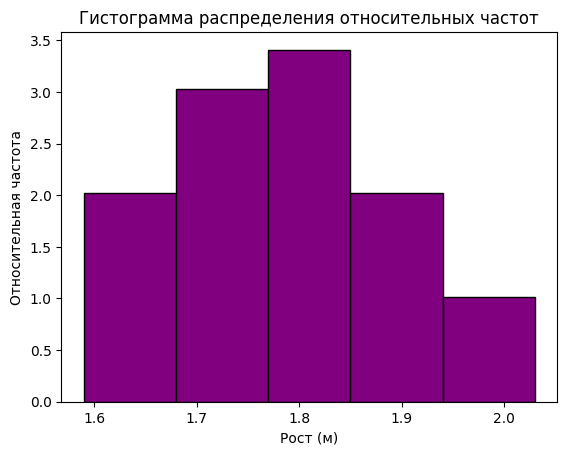

In [12]:
import matplotlib.pyplot as plt

# Построение гистограммы относительных частот
plt.hist(height, bins=intervals, density=True, color='purple', edgecolor='black')
plt.title('Гистограмма распределения относительных частот')
plt.xlabel('Рост (м)')
plt.ylabel('Относительная частота')
plt.grid(False)
plt.show()

Построим график эмпирической функции распределения

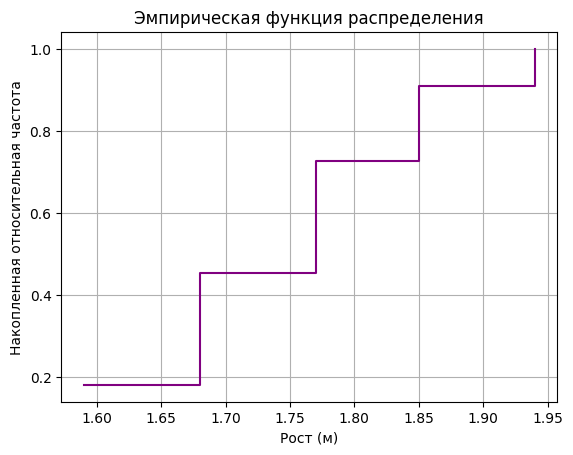

In [13]:
# Вычисление эмпирической функции распределения
empirical_distribution = np.cumsum(relative_frequencies)

# График эмпирической функции распределения
plt.step(interval_edges[:-1], empirical_distribution, where='post', color='purple')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Рост (м)')
plt.ylabel('Накопленная относительная частота')
plt.grid(True)
plt.show()

Рассчитаем выборочные описательные статистики

In [20]:
# Выборочное среднее
mean_value = round(np.mean(height), 2)

# Выборочная дисперсия
variance = round(np.var(height, ddof=1), 2)

# Выборочное стандартное отклонение
std_deviation = round(np.std(height, ddof=1), 2)

# Выборочная медиана
median_value = round(np.median(height), 2)

# Выборочная мода
mode_value = round(stats.mode(height)[0], 2)

# Коэффициент вариации
coefficient_of_variation = round((std_deviation / mean_value) * 100, 2)

print(f'Выборочное среднее: {mean_value}, \
        \nВыборочная дисперсия: {variance}, \
        \nВыборочное стандартное отклонение: {std_deviation}, \
        \nВыборочная медиана: {median_value}, \
        \nКоэффициент вариации: {coefficient_of_variation}%')


Выборочное среднее: 1.78,         
Выборочная дисперсия: 0.01,         
Выборочное стандартное отклонение: 0.12,         
Выборочная медиана: 1.77,         
Коэффициент вариации: 6.74%
